1. [Обзор данных](#start)
2. [Предобработка данных](#preprocessing)
    * [Обработка пропусков](#nan)
    * [Замена типа данных](#type)
    * [Обработка дубликатов](#duplicates)
    * [Лемматизация](#lemmas)
    * [Категоризация данных](#category)
    * [Ошибки в данных](#errors)
3. [Ответьте на вопросы](#answers)
4. [Общий вывод](#conclusion)
5. [Чек-лист готовности проекта](#check_list)


# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**
* `children` — количество детей в семье
* `days_employed` — трудовой стаж в днях
* `dob_days` — возраст клиента в годах
* `education` — образование клиента
* `education_id` — идентификатор образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — доход в месяц
* `purpose` — цель получения кредита

<a id="start"></a>
## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

customer_solvency = pd.read_csv('/datasets/data.csv')
customer_solvency.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
customer_solvency.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

**Убедились, что нет лишних пробелов в названиях колонок (в конце)**

In [3]:
customer_solvency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Итак, в каждой строке таблицы информация о заемщике - о его семейном, финансовом положении и целях кредита.
**Особенности:**
* В столбце `days_employed` встречаются отрицательные значения &#129300;
* В столбце `education` есть дубликаты с различным регистром (возможно `education_id` решает эту проблему )
* В столбце `days_employed`, `total_income` есть пропуски в одинаковом количестве &#129300;

<a id="preprocessing"></a>
## Шаг 2. Предобработка данных

<a id="nan"></a>
### Обработка пропусков

In [4]:
customer_solvency.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
customer_solvency.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

Все пропущенные значения **NaN** => причина пропуска - отсутствие данных. Количество пропусков в столбцах одинаково, возможно это одни и теже строки. Проверим предположение

In [6]:
total_income_nan = customer_solvency[customer_solvency['total_income'].isna()]
display(total_income_nan.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [7]:
total_income_nan[total_income_nan['days_employed'].isna()].shape

(2174, 12)

Действительно, строки совпадают. Нет стажа - нет дохода 🤔
Т.к. `Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок`, то считаем, что столбец со стажем можно исключить. 
Чтобы заполнить пропуски в колонке с **доходами**, сгруппируем данные по **типу занятости** и заменим пропуски **медианным** значением

In [8]:
customer_solvency.pop('days_employed')
display(customer_solvency.head())

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [9]:
customer_solvency['total_income'] = customer_solvency['total_income'].fillna(customer_solvency.groupby('income_type')['total_income'].transform('median'))
display(customer_solvency.isna().sum())

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

Выявили пропуски в двух колонках. Столбец `days_employed` был исключен, т.к. не будет использоваться в дальнейшем анализе, а пропуски в `total_income` заполнены медианными значениями по каждому типу занятости  

<a id="type"></a>
### Замена типа данных

In [10]:
customer_solvency['total_income'] = customer_solvency['total_income'].astype('int64')
display(customer_solvency.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   dob_years         21525 non-null  int64 
 2   education         21525 non-null  object
 3   education_id      21525 non-null  int64 
 4   family_status     21525 non-null  object
 5   family_status_id  21525 non-null  int64 
 6   gender            21525 non-null  object
 7   income_type       21525 non-null  object
 8   debt              21525 non-null  int64 
 9   total_income      21525 non-null  int64 
 10  purpose           21525 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


None

**Вывод**

Заменили тип `total_income` на int64. Теперь количественные категории датасета одного типа

<a id="duplicates"></a>
### Обработка дубликатов

Выполним проверку на наличие неявных дубликатов в столбце `education` и приведем к одному регистру для их устранения

In [11]:
customer_solvency['education'].sort_values().unique()

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

In [12]:
customer_solvency['education'] = customer_solvency['education'].str.lower()

In [13]:
customer_solvency['education'].sort_values().unique()

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

Выполним проверку на наличие явных дубликатов и удалим при обнаружении с помощью метода  drop_duplicates(), а метод reset_index(drop=True) восстановит правильную идексацию в наборе

In [14]:
customer_solvency.duplicated().sum()

71

In [15]:
customer_solvency = customer_solvency.drop_duplicates().reset_index(drop=True)

In [16]:
customer_solvency.duplicated().sum()

0

**Вывод**

Итак, в наборе данных обнаружили и устранены явные и неявные дубликаты

<a id="lemmas"></a>
### Лемматизация

In [17]:
from pymystem3 import Mystem
lemmas_list = []
words_list =[]
m = Mystem()
unique_purpose_list = customer_solvency['purpose'].unique()
for purpose in unique_purpose_list:
    lemmas = ''.join(m.lemmatize(purpose)).strip() #лемматизация и удаление символа переноса строки
    lemmas_list.append(lemmas)  
display(lemmas_list)

['покупка жилье',
 'приобретение автомобиль',
 'дополнительный образование',
 'сыграть свадьба',
 'операция с жилье',
 'образование',
 'на проведение свадьба',
 'покупка жилье для семья',
 'покупка недвижимость',
 'покупка коммерческий недвижимость',
 'покупка жилой недвижимость',
 'строительство собственный недвижимость',
 'недвижимость',
 'строительство недвижимость',
 'на покупка подержать автомобиль',
 'на покупка свой автомобиль',
 'операция с коммерческий недвижимость',
 'строительство жилой недвижимость',
 'жилье',
 'операция со свой недвижимость',
 'автомобиль',
 'заниматься образование',
 'сделка с подержанный автомобиль',
 'получение образование',
 'автомобиль',
 'свадьба',
 'получение дополнительный образование',
 'покупка свой жилье',
 'операция с недвижимость',
 'получение высокий образование',
 'свой автомобиль',
 'сделка с автомобиль',
 'профильный образование',
 'высокий образование',
 'покупка жилье для сдача',
 'на покупка автомобиль',
 'ремонт жилье',
 'заниматься вы

**Вывод**

Определили уникальные цели кредита, лемматизировали каждую из них. Исходя из полученных данных, можно выделить 4 основные категории целей:
* недвижимость
* автомобиль
* образование
* свадьба

Теперь сможем использовать их для категоризации данных по цели кредита

In [18]:
from collections import Counter

words_list = []
for lemma in lemmas_list:
    words_list += lemma.split()
    
Counter(words_list)

Counter({'покупка': 10,
         'жилье': 7,
         'приобретение': 1,
         'автомобиль': 9,
         'дополнительный': 2,
         'образование': 9,
         'сыграть': 1,
         'свадьба': 3,
         'операция': 4,
         'с': 5,
         'на': 4,
         'проведение': 1,
         'для': 2,
         'семья': 1,
         'недвижимость': 10,
         'коммерческий': 2,
         'жилой': 2,
         'строительство': 3,
         'собственный': 1,
         'подержать': 1,
         'свой': 4,
         'со': 1,
         'заниматься': 2,
         'сделка': 2,
         'подержанный': 1,
         'получение': 3,
         'высокий': 3,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1})

<a id="category"></a>
### Категоризация данных

Создадим  в наборе столбец `purpose_category`, в который запишем одну из упомянутых выше категорию. Для этого напишем функцию, которая принимает строку набора, лемматизирует ее столбец `purpose` и ищет в нем новую категорию

In [19]:
def categorize_purpose(raw):
    purpose_lemma = m.lemmatize(raw['purpose']) 
    if 'жилье' in purpose_lemma or 'недвижимость' in purpose_lemma:
        return 'недвижимость'
    if 'автомобиль' in purpose_lemma:
        return 'автомобиль' 
    if 'образование' in purpose_lemma:
        return 'образование'
    if 'свадьба' in purpose_lemma:
        return 'свадьба'
customer_solvency['purpose_category'] = customer_solvency.apply(categorize_purpose, axis=1) # применим функцию 
                                                                            # categorize_purpose к каждой строке набора
display(customer_solvency.head())

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


In [20]:
customer_solvency['purpose_category'].isna().sum()

0

Добавим столбец `debt_category`, чтобы разделить на категории `нет задолженности` и `задолженность`

In [21]:
def categorize_debt(raw):
    if raw['debt'] == 0:
        return 'нет задолженности'
    else:
        return 'задолженность'
customer_solvency['debt_category'] = customer_solvency.apply(categorize_debt, axis=1) # применим функцию 
                                                                            # categorize_debt к каждой строке набора


Разделим на категории по доходам с помощью квартилей на:
* нищий класс
* бедный класс
* средний класс
* богатый класс

In [22]:
def categorize_income(raw):
    quantilies = customer_solvency['total_income'].quantile([0.25,0.5,0.75]).astype('int64')
    if raw['total_income'] < quantilies[0.25]:
        return 'нищий класс'
    if quantilies[0.25] <= raw['total_income'] < quantilies[0.5]:
        return 'бедный класс'
    if quantilies[0.5] <= raw['total_income'] < quantilies[0.75]:
        return 'средний класс'
    if raw['total_income'] >= quantilies[0.75]:
        return 'богатый класс'
customer_solvency['income_category'] = customer_solvency.apply(categorize_income, axis=1) # применим функцию 
                                                                            # categorize_income к каждой строке набора
display(customer_solvency.head())

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,debt_category,income_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,нет задолженности,богатый класс
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,нет задолженности,бедный класс
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,нет задолженности,средний класс
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,нет задолженности,богатый класс
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,нет задолженности,средний класс


<a id="errors"></a>
### Ошибки в данных

Проверим столбцы `children`, `dob_years`, `gender`, `debt`  на наличие нестандартных значений

In [23]:
for column in ['children', 'dob_years', 'gender', 'debt']:
    print(customer_solvency[column].value_counts(),'\n\n')

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64 


35    616
40    607
41    605
34    601
38    597
42    596
33    581
39    572
31    559
36    554
44    545
29    544
30    537
37    536
48    536
50    513
43    512
32    509
49    508
28    503
45    496
27    493
52    484
56    483
47    477
54    476
46    472
53    459
57    456
58    454
51    446
59    443
55    443
26    408
60    374
25    357
61    354
62    348
63    269
24    264
64    260
23    252
65    193
22    183
66    182
67    167
21    111
0     101
68     99
69     85
70     65
71     56
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64 


F      14174
M       7279
XNA        1
Name: gender, dtype: int64 


0    19713
1     1741
Name: debt, dtype: int64 




Итак, работы прибавилось🙄
* в столбце `gender` обнаружена личность, неопределившаяся с полом. ШТОШ, в такое время живем 🤐
* в столбце `dob_years` обнаружены новорожденные с кредитами. ШТОШ, деньги нужны всем. Либо кто-то молодится и не указывает возраст, либо чьи-то махинации, черные делишки🤫
* в столцсе `children` выявлены оооочень многодетные семьи, аж с 20-ю детьми. ШТОШ, люди мы недоверчивые, проверили в интернете, лишь одна семья на всю страну. Так что таких людей с кредитами максимум двое🧐 А также негативные семьи - семьи с отрицательным количеством детей, кому-то все-таки удалось родиться обратно🤡

В целом, столбцы `gender` и `dob_years` для ответа на поставленные вопросы не нужны, поэтому имеем полное право их исключть. Но думать надо было раньше, а теперь работаем, исправляем😤

Люди мы консервативные, поэтому личности с неопределенным полом даруем статус женщины - `F`. Дадим еще одной женщине кредит! От нас не убудет, статистика от этого не изменится, так как женщин с кредитами почти в 2 раза больше, чем мужчин

In [24]:
customer_solvency['gender'] = customer_solvency['gender'].replace('XNA', 'F')

Проверим

In [25]:
customer_solvency[customer_solvency['gender'] == 'XNA']

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,debt_category,income_category


Проблему с возрастом решим заменой `0` на `средний возраст`

In [26]:
print(customer_solvency['dob_years'].mean(),customer_solvency['dob_years'].median() )

43.271231471986574 42.0


In [27]:
age_for_change = customer_solvency['dob_years'].mean().astype('int64')
customer_solvency['dob_years'] = customer_solvency['dob_years'].replace(0,age_for_change )

print(customer_solvency[customer_solvency['dob_years']==0])
display(customer_solvency.head())
customer_solvency['dob_years'] = customer_solvency['dob_years'].replace(0, customer_solvency.groupby('income_type')['dob_years'].transform('median'))
display(customer_solvency.head())
print(customer_solvency.loc[99])

Проверим

In [28]:
customer_solvency[customer_solvency['dob_years'] == 0]

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,debt_category,income_category


Мы, конечно, не правительство, но проблему с детьми кто-то же должен решать. Так как удалять детей это бесчеловечно, то дабы отношение количества бездетных людей к людям с детьми изменилось минимально, создадим новый столбец `children_category` и установим:
* `1_2_ребенка`, при условии 1 <= количество детей <= 2 
* `нет детей` , если количество детей <= 0.
* `многодетный`, если количество детей > 2

In [29]:
print(customer_solvency['children'].mean(),customer_solvency['children'].median() )

0.5399459308287499 0.0


In [30]:
def categorize_children(raw):
    if raw['children'] <= 0:
        return 'нет детей'
    if 0 < raw['children'] <= 2:
        return '1_2_ребенка'
    else:
        return 'многодетный'  
customer_solvency['children_category'] = customer_solvency.apply(categorize_children, axis=1) # применим функцию 
                                                                            # categorize_children к каждой строке набора
display(customer_solvency.head())

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,debt_category,income_category,children_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,нет задолженности,богатый класс,1_2_ребенка
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,нет задолженности,бедный класс,1_2_ребенка
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,нет задолженности,средний класс,нет детей
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,нет задолженности,богатый класс,многодетный
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,нет задолженности,средний класс,нет детей


**Вывод**

Категоризировали данные по целям кредита,по задолженности, по уровню дохода, по количеству детей теперь сможем использовать эти столбцы для группировок. Пропусков в новых столбцах не обнаружено. Исправили нестандартные значения в столбцах с возрастом и полом. Можно приступать к проверки гипотез

<a id="answers"></a>
## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [31]:
import seaborn as sns
def table_info(table):
    debt_sum = table.sum(axis=1) #общее количество задолженностей

    #children_debt_table['задолженность'][0]/(children_debt_table['задолженность'][0]
    # + children_debt_table['задолженность'][1] + children_debt_table['нет задолженности'][0]) * 100
    
    debt_percent = [table['задолженность'][i]/debt_sum[i] * 100  for i in range(len(table['задолженность']))] # доля задолженности family_status
                                                                         #от общего количества задолженностей
    table['debt_percent'] = debt_percent
    display(table)
    sns.barplot(table.index, table['debt_percent'])


debt_category,задолженность,нет задолженности,debt_percent
children_category,,,
1_2_ребенка,638,6222,9.300292
многодетный,39,417,8.552632
нет детей,1064,13074,7.525817


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


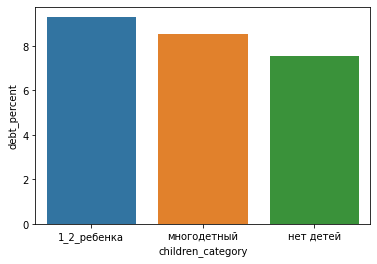

In [32]:
children_debt_table = customer_solvency.pivot_table(index=['children_category'], columns='debt_category',
                                                    values='debt',aggfunc='count')

table_info(children_debt_table)

**Вывод**

Исходя из полученного выше результата, можно сделат вывод, что наименьший процент должников среди категории `нет детей` и наибольший среди категории `1_2_ребенка`

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

debt_category,задолженность,нет задолженности,debt_percent
family_status,,,
Не женат / не замужем,274,2536,9.750890
в разводе,85,1110,7.112971
вдовец / вдова,63,896,6.569343
гражданский брак,388,3763,9.347145
женат / замужем,931,11408,7.545182


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


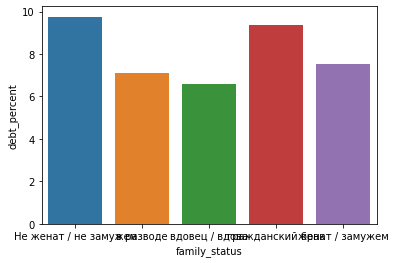

In [33]:
family_status_debt_table = customer_solvency.pivot_table(index=['family_status'], columns='debt_category', values='debt', aggfunc='count')

table_info(family_status_debt_table)

**Вывод**

Наибольший процент задолженностей у людей со статусом `не женат/не замужем` и `гражданский брак`

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

debt_category,задолженность,нет задолженности,debt_percent
income_category,,,
бедный класс,385,4024,8.732139
богатый класс,383,4981,7.140194
нищий класс,427,4937,7.960477
средний класс,546,5771,8.643343


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


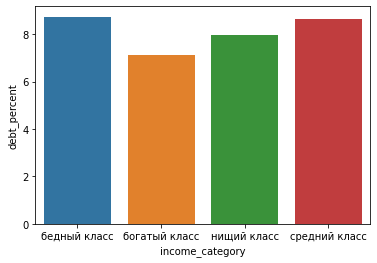

In [34]:
income_debt_table = customer_solvency.pivot_table(index=['income_category'], columns='debt_category', values='debt', aggfunc='count')

table_info(income_debt_table)    

**Вывод**

Разделение по доходам указывает на то. что `бедный класс` имееет больше всего долгов. Хотя в целом уровень задолженностей приблизительно одинаков

- Как разные цели кредита влияют на его возврат в срок?

debt_category,задолженность,нет задолженности,debt_percent
purpose_category,,,
автомобиль,403,3903,9.359034
недвижимость,782,10029,7.233373
образование,370,3643,9.220035
свадьба,186,2138,8.003442


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


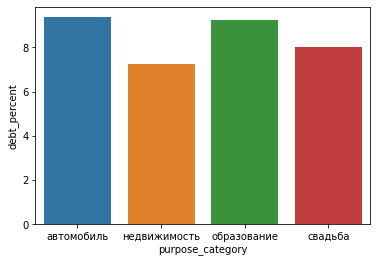

In [35]:
purpose_category_debt_table = customer_solvency.pivot_table(index=['purpose_category'], columns='debt_category', values='debt', aggfunc='count')
table_info(purpose_category_debt_table)

**Вывод**

Около половины всех займов берется с целью вложения в недвижимость и имеет наиболее редкие задолженности

<a id="conclusion"></a>
## Шаг 4. Общий вывод

Провели исследование надежности заемщиков.
Ответили на четыре поставленных вопроса:
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?

Установили, что люди с детьми наименее надежная категория для выдачи кредита

2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
не женатые/не замужние люди наиболее склонны к накоплению долгов

3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
Состоятельные граждане чаще возвращают займы в срок, но следует отметить, что средний класс является самым многочисленным по количеству займов. Следовательно, больше возвратов и больше долгов

4. Как разные цели кредита влияют на его возврат в срок?
Займы для недвижимости оказались самыми популярными и надежными

